# Demo: VGG without Pre-trained Weights

Below, you'll see how setting `weights=None` is equivalent to an un-trained network.

### Load example images and pre-process them

In [5]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

image_paths = glob('images/*.jpg')

i = 2 # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

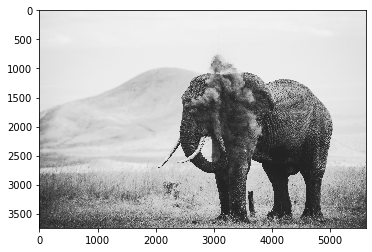

In [8]:
# View an example of an image
example = mpimg.imread(image_paths[1])
plt.imshow(example)
plt.show()

### Load VGG16 model, but without pre-trained weights
This time, we won't use the pre-trained weights, so we'll likely get so wacky predictions.

In [11]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load VGG16 without pre-trained weights
model = VGG16(weights=None)

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n04251144', 'snorkel', 0.0016751218), ('n03764736', 'milk_can', 0.001662011), ('n04192698', 'shield', 0.001597533)]


When we ran each image, we got a hand-blower, a guenon (a type of African monkey) and a mink. A little bit different than the elephant, labrador and zebra they are supposed to be!